In [1]:
import pandas as pd
import numpy as np
import zipfile

In [2]:
local_zip='/content/0753aae4bec411eb.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()
zip_ref.close()


In [32]:
df=pd.read_csv('/content/Train.csv')
df.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,12,2009,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,2018,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,6,2015,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,6,2015,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,2,2019,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [33]:
df['BiasInfluentialFactor'].value_counts()

DegreeBranch          2858
Gender                2605
YearsOfExperince      1561
CurrentCompanyType    1174
EmpScore               659
HighestDegree          582
Ethinicity             328
MartialStatus          280
LatestDegreeCGPA       262
Name: BiasInfluentialFactor, dtype: int64

Feature Engineering

In [34]:
df['LanguageOfCommunication']=df['LanguageOfCommunication'].replace({'English':0,'Hindi':1,'Native':2})
df['Gender']=df['Gender'].replace({'Male':0,'Female':1,'Other':2})
df['JobProfileIDApplyingFor']=df['JobProfileIDApplyingFor'].replace({'JR85289':0,'JR87525':1,'JR88879':2,'JR89890':3,'JR88873':4,'JR81165':5,'JR79193':6,'JR88654':7,'JR70175':8})
df['HighestDegree']=df['HighestDegree'].replace({'B.Tech':0,'M.Tech':1,'BCA':2,'MS':3,'Dual M.Tech':4,'Dual MBA':5,'PhD':6,'MCA':7})
df['DegreeBranch']=df['DegreeBranch'].replace({'Computer Science':0,'Information Technology':1,'Artificial Intelligence':2,'Electrical':3,'Electronics':4,'Electrical and Electronics':5})
df['GraduatingInstitute']=df['GraduatingInstitute'].replace({'Tier 2':0,'Tier 1':1,'Tier 3':2})
df['MartialStatus']=df['MartialStatus'].replace({'Married':0,'Single':1})
df['CurrentDesignation']=df['CurrentDesignation'].replace({'SDE':0,'SSE':1,'DS':2,'BA':3,'EM':4,'SEM':5,'DA':6,'DE':7})
df['CurrentCompanyType']=df['CurrentCompanyType'].replace({'Startup':0,'Enterprise':1,'MidSized':2})
df['DepartmentInCompany']=df['DepartmentInCompany'].replace({'Engineering':0,'Design':1,'Customer Success':2,'Product':3,'Finance':4})

In [21]:
df.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,0,35,0,0,0,3,1,7,12,2009,21,26,0,5,1,1,1,20,YearsOfExperince,95.40
1,15079,William,0,26,0,1,0,2,2,7,3,2018,15,19,0,5,3,2,0,6,NaN,67.09
2,18638,James,0,36,1,1,6,0,1,6,6,2015,15,24,1,5,0,2,0,19,Gender,91.26
3,3941,Charles,0,29,1,1,2,1,0,5,6,2015,16,24,0,5,0,0,3,16,Gender,72.29
4,5936,George,0,25,0,8,4,0,2,8,2,2019,24,32,0,5,0,1,0,10,DegreeBranch,86.34


Drop Unimportant Feature

In [35]:
df.drop('EmpID',axis=1,inplace=True)
df.drop('EmpName',axis=1,inplace=True)
df.head()


,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,0,35,0,0,0,3,1,7,12,2009,21,26,0,5,1,1,1,20,YearsOfExperince,95.40
1,0,26,0,1,0,2,2,7,3,2018,15,19,0,5,3,2,0,6,NaN,67.09
2,0,36,1,1,6,0,1,6,6,2015,15,24,1,5,0,2,0,19,Gender,91.26
3,0,29,1,1,2,1,0,5,6,2015,16,24,0,5,0,0,3,16,Gender,72.29
4,0,25,0,8,4,0,2,8,2,2019,24,32,0,5,0,1,0,10,DegreeBranch,86.34


In [64]:
df4['BiasInfluentialFactor']=df4['BiasInfluentialFactor'].fillna(0)

In [38]:
#train=df[df['BiasInfluentialFactor']!='Others']
#test=df[df['BiasInfluentialFactor']=='Others']

In [65]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
LanguageOfCommunication,13645.0,0.552364,0.672895,0.00,0.00,0.00,1.00,2.0
Age,13645.0,30.691242,3.881378,24.00,28.00,31.00,34.00,42.0
Gender,13645.0,0.455258,0.621487,0.00,0.00,0.00,1.00,2.0
JobProfileIDApplyingFor,13645.0,1.919384,2.165014,0.00,0.00,1.00,3.00,8.0
HighestDegree,13645.0,1.723122,1.913092,0.00,0.00,1.00,3.00,7.0
DegreeBranch,13645.0,1.553683,1.518718,0.00,0.00,1.00,3.00,5.0
GraduatingInstitute,13645.0,0.755808,0.767561,0.00,0.00,1.00,1.00,2.0
LatestDegreeCGPA,13645.0,7.100257,1.346539,4.00,6.00,7.00,8.00,10.0
YearsOfExperince,13645.0,6.547746,3.426920,1.00,4.00,7.00,9.00,12.0
GraduationYear,13645.0,2014.452254,3.426920,2009.00,2012.00,2014.00,2017.00,2020.0


In [40]:
lb=LabelEncoder()
train['BiasInfluentialFactor']=lb.fit_transform(train['BiasInfluentialFactor'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train['BiasInfluentialFactor']=lb.fit_transform(train['BiasInfluentialFactor'])

In [4]:
df2=pd.read_csv('/content/Test.csv')
df2.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,5,2016,27,34,Single,4,SDE,Enterprise,Finance,18
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,12,2009,29,33,Married,4,EM,Enterprise,Engineering,8
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,2,2019,18,25,Married,3,SDE,Startup,Engineering,18
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,11,2010,7,12,Single,5,DS,Enterprise,Product,17
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,6,2015,22,32,Married,4,SDE,Startup,Engineering,9


In [76]:
df2['LanguageOfCommunication']=df2['LanguageOfCommunication'].replace({'English':0,'Hindi':1,'Native':2})
df2['Gender']=df2['Gender'].replace({'Male':0,'Female':1,'Other':2})
df2['JobProfileIDApplyingFor']=df2['JobProfileIDApplyingFor'].replace({'JR85289':0,'JR87525':1,'JR88879':2,'JR89890':3,'JR88873':4,'JR81165':5,'JR79193':6,'JR88654':7,'JR70175':8})
df2['HighestDegree']=df2['HighestDegree'].replace({'B.Tech':0,'M.Tech':1,'BCA':2,'MS':3,'Dual M.Tech':4,'Dual MBA':5,'PhD':6,'MCA':7})
df2['DegreeBranch']=df2['DegreeBranch'].replace({'Computer Science':0,'Information Technology':1,'Artificial Intelligence':2,'Electrical':3,'Electronics':4,'Electrical and Electronics':5})
df2['GraduatingInstitute']=df2['GraduatingInstitute'].replace({'Tier 2':0,'Tier 1':1,'Tier 3':2})
df2['MartialStatus']=df2['MartialStatus'].replace({'Married':0,'Single':1})
df2['CurrentDesignation']=df2['CurrentDesignation'].replace({'SDE':0,'SSE':1,'DS':2,'BA':3,'EM':4,'SEM':5,'DA':6,'DE':7})
df2['CurrentCompanyType']=df2['CurrentCompanyType'].replace({'Startup':0,'Enterprise':1,'MidSized':2})
df2['DepartmentInCompany']=df2['DepartmentInCompany'].replace({'Engineering':0,'Design':1,'Customer Success':2,'Product':3,'Finance':4})

In [77]:
df2.drop('EmpID',axis=1,inplace=True)
df2.drop('EmpName',axis=1,inplace=True)
df2.head()


,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,2,35,0,0,6,1,0,5,5,2016,27,34,1,4,0,1,4,18
1,0,35,0,0,0,1,2,9,12,2009,29,33,0,4,4,1,0,8
2,0,28,0,1,1,2,0,9,2,2019,18,25,0,3,0,0,0,18
3,1,37,0,1,3,0,0,8,11,2010,7,12,1,5,2,1,3,17
4,1,36,1,0,6,2,0,7,6,2015,22,32,0,4,0,0,0,9


Correlation between Features

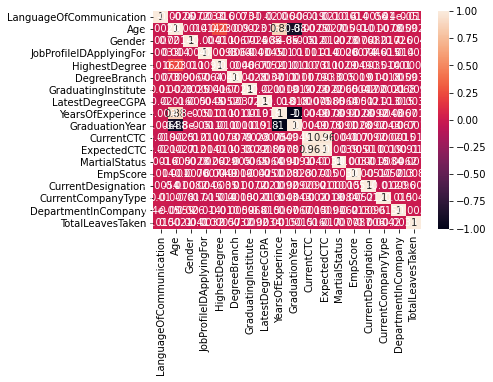

In [78]:
import seaborn as sns
sns.heatmap(df4.corr(),annot=True)

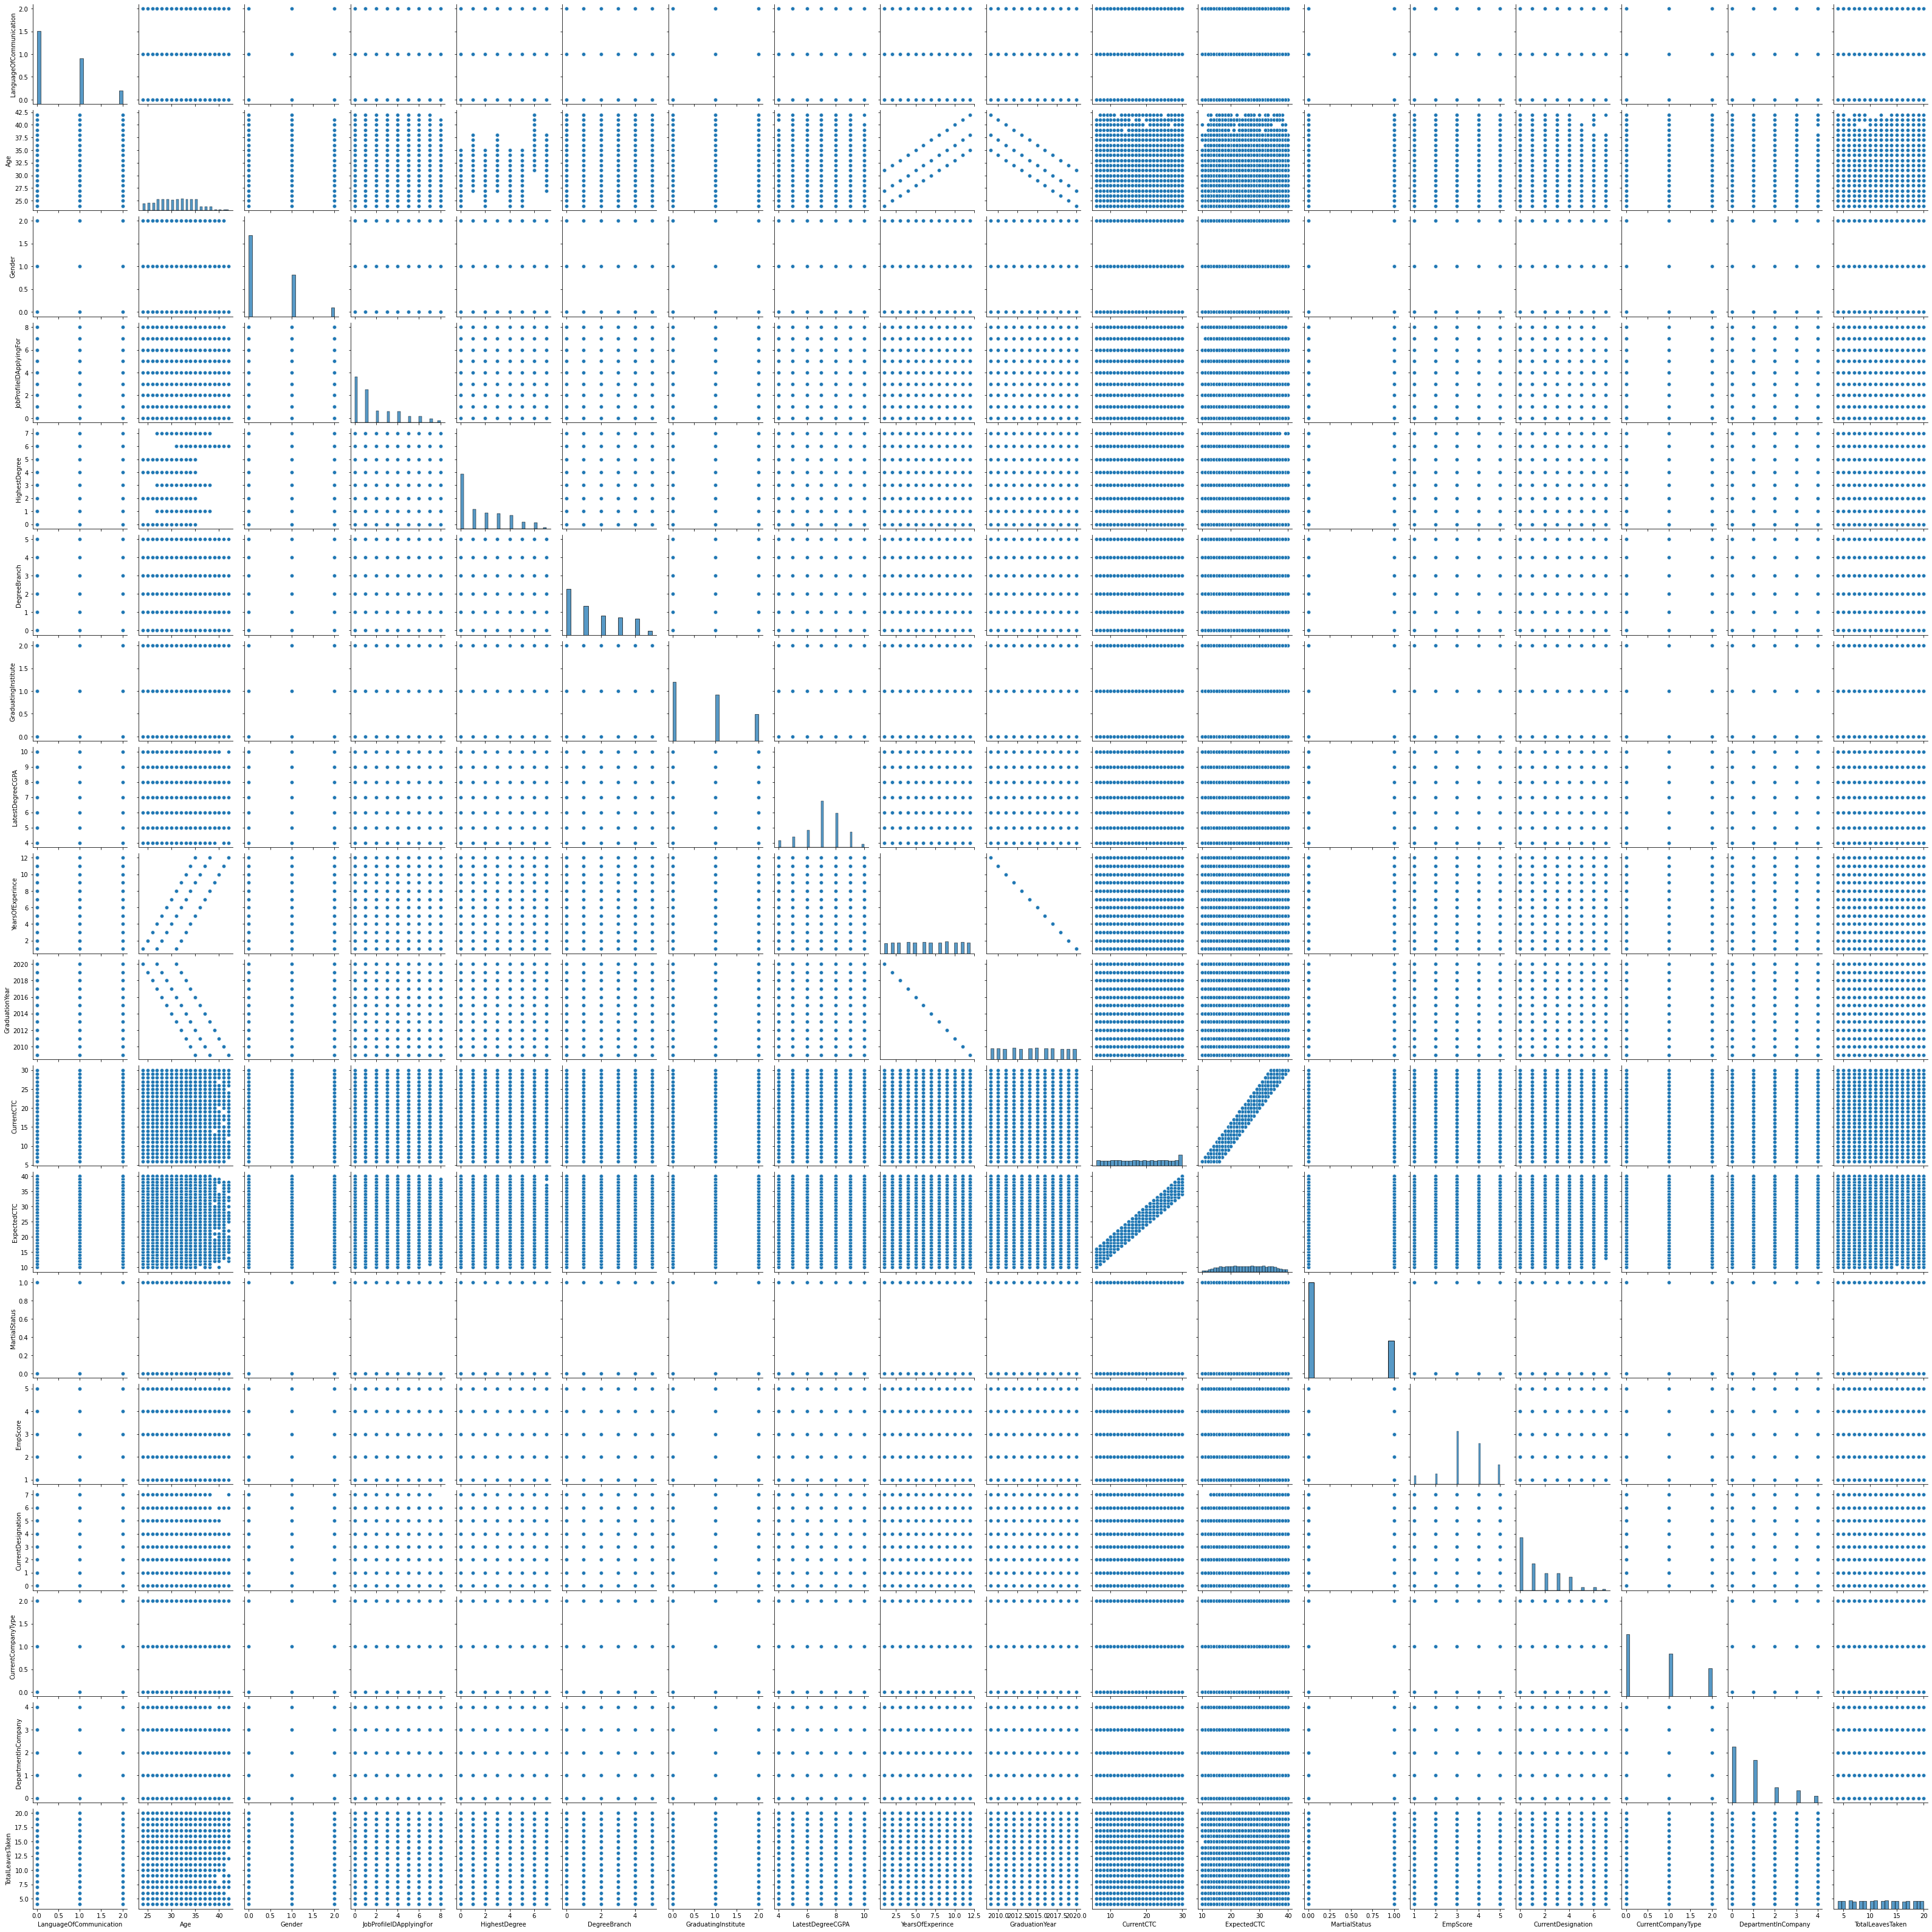

In [94]:
sns.pairplot(df4)

In [67]:
ytrain=df4['BiasInfluentialFactor']
ytrain1=df4['FitmentPercent']
df4.drop("BiasInfluentialFactor", axis = 1, inplace = True)
df4.drop("FitmentPercent", axis = 1, inplace = True)


Libraries

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor

In [74]:
train_x,test_x,train_y,test_y=train_test_split(df4,ytrain,test_size=0.2)

In [81]:
train_x1,test_x1,train_y1,test_y1=train_test_split(df4,ytrain1,test_size=0.2)

In [86]:
model=LGBMClassifier()
model.fit(df4,ytrain)
#o=model.predict(test_x)
#print(accuracy_score(test_y,o))


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [87]:
model1=RandomForestRegressor()
model1.fit(df4,ytrain1)
#o=model1.predict(test_x1)
#print(mean_squared_error(test_y1,o))


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [80]:
pre=model.predict(df2)
pre

array([1, 1, 7, ..., 1, 0, 6])

In [88]:
pre1=model1.predict(df2)
pre1

array([91.148 , 90.3067, 79.2301, ..., 80.4087, 51.7772, 54.562 ])

In [91]:
#df7=pd.DataFrame(pre,pre1)
df7.head()

,0
91.1480,DegreeBranch
90.3067,DegreeBranch
79.2301,MartialStatus
55.2591,CurrentCompanyType
78.3246,Gender


In [90]:
#test['BiasInfluentialFactor']=df7[0]
#train['BiasInfluentialFactor']=ytrain
df7[0]=lb.inverse_transform(df7[0])

In [66]:
#df4['BiasInfluentialFactor']=df4['BiasInfluentialFactor'].astype(int)
#df4.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,FitmentPercent,BiasInfluentialFactor
0,0,35,0,0,0,3,1,7,12,2009,21,26,0,5,1,1,1,20,95.40,8
2,0,36,1,1,6,0,1,6,6,2015,15,24,1,5,0,2,0,19,91.26,4
3,0,29,1,1,2,1,0,5,6,2015,16,24,0,5,0,0,3,16,72.29,4
4,0,25,0,8,4,0,2,8,2,2019,24,32,0,5,0,1,0,10,86.34,1
5,2,35,0,2,2,0,0,9,12,2009,25,29,0,4,2,2,0,10,93.23,8


In [62]:
#df4=train.append(test)
#df4.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,FitmentPercent,BiasInfluentialFactor
0,0,35,0,0,0,3,1,7,12,2009,21,26,0,5,1,1,1,20,95.40,8.0
2,0,36,1,1,6,0,1,6,6,2015,15,24,1,5,0,2,0,19,91.26,4.0
3,0,29,1,1,2,1,0,5,6,2015,16,24,0,5,0,0,3,16,72.29,4.0
4,0,25,0,8,4,0,2,8,2,2019,24,32,0,5,0,1,0,10,86.34,1.0
5,2,35,0,2,2,0,0,9,12,2009,25,29,0,4,2,2,0,10,93.23,8.0


In [92]:
df7.to_csv('tiktok3.csv')

In [93]:
df8=pd.read_csv('/content/sample submission.csv')
df8.head()

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,MaritalStatus,25.14
1,23568,DegreeBranch,91.44
2,21490,MartialStatus,76.92
3,8363,HighestDegree,77.92
4,6165,Gender,85.64
